In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt


In [2]:
GPU_timings =  pd.read_csv('Scaling_time.csv', header=0, sep=',', names=['Nodes','Richardson','Gauss-Seidel','CG','SSOR'], usecols=['Nodes','Richardson','Gauss-Seidel','CG','SSOR'], dtype=np.float64)

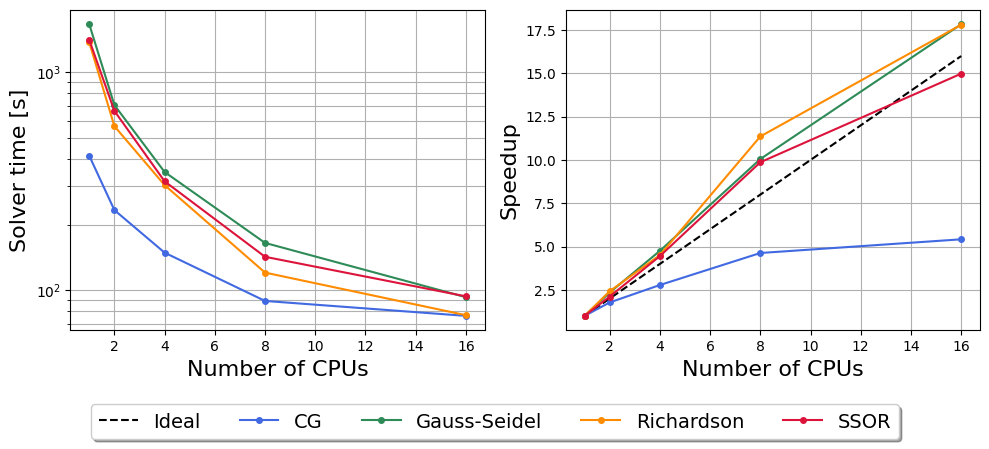

In [3]:
fig, axes = plt.subplots(1, 2,figsize=(10, 4))

colors = ['royalblue', 'seagreen', 'darkorange','crimson']

for c, preconditioner in enumerate(['CG','Gauss-Seidel','Richardson','SSOR']):
    axes[0].plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get(preconditioner)), marker="o",markersize=4,color=colors[c], label=preconditioner)


##plt.title("GPU Strong Scaling of LandauDamping (256³,134217728, 0.05)", fontsize=16)
axes[0].set_yscale('log')
axes[0].set_ylabel("Solver time [s]", fontsize=16)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
axes[0].set_xlabel('Number of CPUs', fontsize=16)
#plt.xticks(np.arange(1,129,step=1))
axes[0].grid('True', which='both')


axes[1].plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get('Nodes')), color='black', linestyle='--',  label="Ideal")
for c,preconditioner in enumerate(['CG','Gauss-Seidel','Richardson','SSOR']):
    axes[1].plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get(preconditioner))[0]/np.array(GPU_timings.get(preconditioner)),color=colors[c], marker="o",markersize=4,  label=preconditioner)


#plt.title("GPU Speedup of LandauDamping (256³,134217728, 0.05)", fontsize=16)
#plt.yscale('log')
axes[1].set_ylabel("Speedup", fontsize=16)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
#plt.xticks(np.arange(1,5,step=1))
axes[1].set_xlabel('Number of CPUs', fontsize=16)
axes[1].grid('True', which='both')

handles, labels = axes[1].get_legend_handles_labels()


fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.0),  
    fancybox=True,
    shadow=True,
    ncol=5,
    prop={'size': 14}
)


plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig('LandauDamping_CPU.pdf',bbox_inches="tight",dpi=600)   
plt.show()
